## Figuras para el TFM.

Imports.

In [1]:
from utils.network import NetworkDrawer, NetworkGenerator

from IPython.display import display
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import pennylane as qml
import random

Configuración de semilla.

In [2]:
random_seed = 3006
np.random.seed(random_seed)
random.seed(random_seed)

Estados cuánticos.

In [3]:
qc = QuantumCircuit(2, 2)

Q = np.identity(4)

qc.u(np.pi/2, 0, 0, 0)
qc.u(np.pi/2, 0, 0, 1)

Statevector.from_instruction(qc).draw("latex")

<IPython.core.display.Latex object>

Esferas de Bloch para 1 qubit.

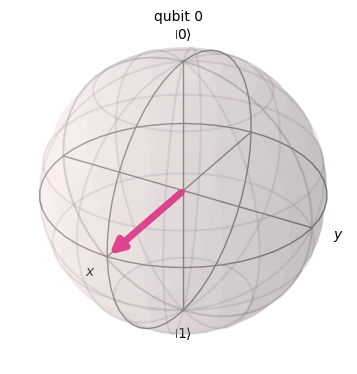

In [4]:
state = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
plot_bloch_multivector(state, figsize=(4,4))

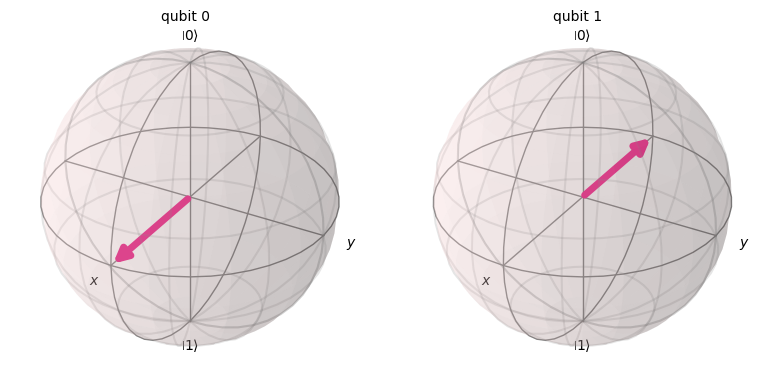

In [5]:
qc = QuantumCircuit(1)

qc.h(0)
original = Statevector.from_instruction(qc)
qc.z(0)
final = Statevector.from_instruction(qc)

plot_bloch_multivector(final.tensor(original), figsize=(4,4))

Circuitos cuánticos.

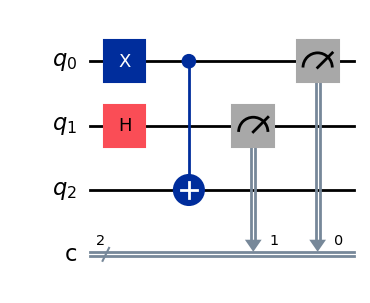

In [6]:
qc = QuantumCircuit(3, 2)

qc.h(1)
qc.x(0)
qc.cx(0,2)
qc.measure([0,1],[0,1])

qc.draw(output='mpl')

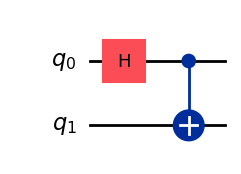

In [7]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

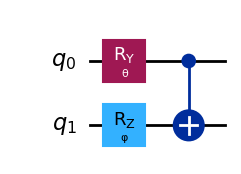

In [8]:
qc = QuantumCircuit(2)

theta = Parameter('θ')
phi = Parameter('φ')
qc.ry(theta, 0)
qc.rz(phi, 1)
qc.cx(0, 1) 

qc.draw(output='mpl')

Puertas cuánticas.

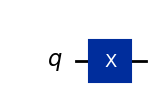

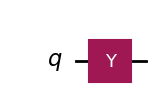

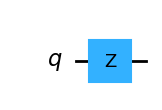

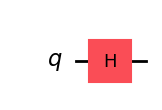

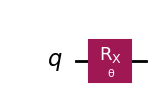

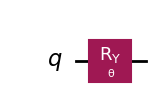

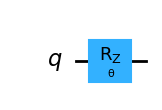

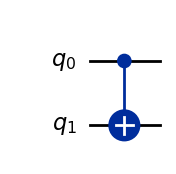

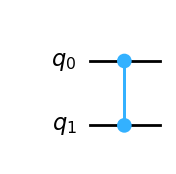

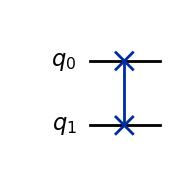

In [9]:
theta = Parameter('θ')

gates_1 = [
    lambda qc: qc.x(0),
    lambda qc: qc.y(0),
    lambda qc: qc.z(0),
    lambda qc: qc.h(0),
    lambda qc: qc.rx(theta, 0),
    lambda qc: qc.ry(theta, 0),
    lambda qc: qc.rz(theta, 0)
]

gates_2 = [
    lambda qc: qc.cx(0,1),
    lambda qc: qc.cz(0,1),
    lambda qc: qc.swap(0,1)
]

for gate in gates_1:
    qc = QuantumCircuit(1)
    gate(qc)
    display(qc.draw(output='mpl'))

for gate in gates_2:
    qc = QuantumCircuit(2)
    gate(qc)
    display(qc.draw(output='mpl'))

Protocolos cuánticos.

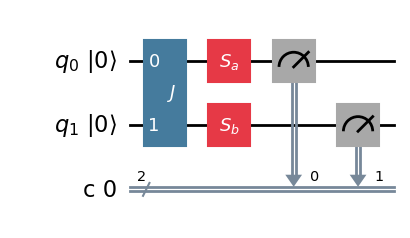

In [10]:
qc = QuantumCircuit(2, 2)

Ug = np.identity(4)
Ua = np.identity(2)
Ub = np.identity(2)

qc.unitary(Ug, qubits = [0,1], label = "$J$")
qc.unitary(Ua, qubits = [0], label = "$S_a$")
qc.unitary(Ub, qubits = [1], label = "$S_b$")
qc.measure([0,1],[0,1])

gate_colours = {
    "displaycolor": {
        "$S_a$": ("#e63946", "#FFFFFF"),
        "$S_b$": ("#e63946", "#FFFFFF"),
        "$J$": ("#457b9d", "#FFFFFF"),
    }
}

qc.draw(output='mpl', style=gate_colours, initial_state=True)

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
/var/folders/fn/_vxf1pjj22qbb11rlb3078jw0000gp/T/ipykernel_2359/2589205553.py:10: SyntaxWarning: invalid escape sequence '\d'
  qc.unitary(J, qubits = [0,1], label = "$J^\dagger$")
/var/folders/fn/_vxf1pjj22qbb11rlb3078jw0000gp/T/ipykernel_2359/2589205553.py:18: SyntaxWarning: invalid escape sequence '\d'
  "$J^\dagger$": ("#457b9d", "#FFFFFF"),


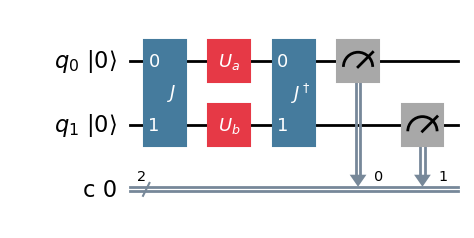

In [11]:
qc = QuantumCircuit(2, 2)

J = np.identity(4)
Ua = np.identity(2)
Ub = np.identity(2)

qc.unitary(J, qubits = [0,1], label = "$J$")
qc.unitary(Ua, qubits = [0], label = "$U_a$")
qc.unitary(Ub, qubits = [1], label = "$U_b$")
qc.unitary(J, qubits = [0,1], label = "$J^\dagger$")
qc.measure([0,1],[0,1])

gate_colours = {
    "displaycolor": {
        "$U_a$": ("#e63946", "#FFFFFF"),
        "$U_b$": ("#e63946", "#FFFFFF"),
        "$J$": ("#457b9d", "#FFFFFF"),
        "$J^\dagger$": ("#457b9d", "#FFFFFF"),
    }
}

qc.draw(output='mpl', style=gate_colours, initial_state=True)

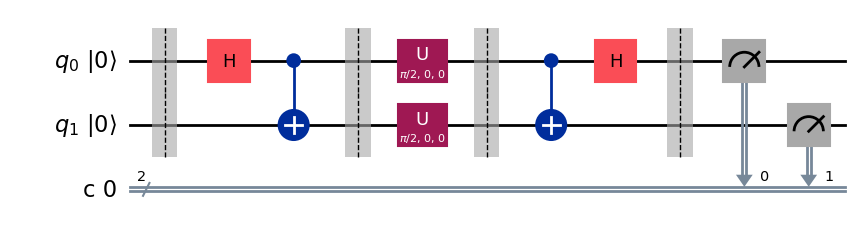

In [12]:
qc = QuantumCircuit(2, 2)

Q = np.identity(4)

qc.barrier()
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.u(np.pi/2, 0, 0, 0)
qc.u(np.pi/2, 0, 0, 1)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure([0,1],[0,1])

qc.draw(output='mpl', initial_state=True)

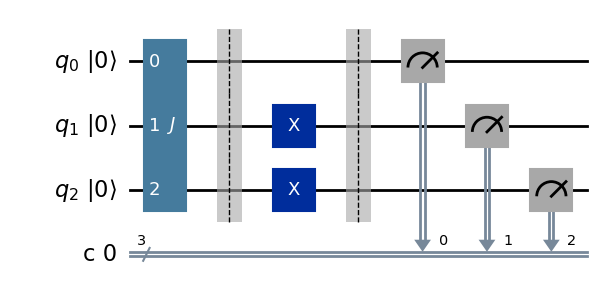

In [13]:
qc = QuantumCircuit(3, 3)

J = np.identity(8)

qc.unitary(J, qubits = [0,1,2], label = "$J$")

qc.barrier()

qc.x(1)
qc.x(2)

qc.barrier()

qc.measure([0,1,2],[0,1,2])

gate_colours = {
    "displaycolor": {
        "$J$": ("#457b9d", "#FFFFFF")
    }
}
qc.draw(output='mpl', style=gate_colours, initial_state=True)

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
/var/folders/fn/_vxf1pjj22qbb11rlb3078jw0000gp/T/ipykernel_2359/327444681.py:15: SyntaxWarning: invalid escape sequence '\d'
  qc.unitary(J, qubits = [0,1,2], label = "$J^\dagger$")
/var/folders/fn/_vxf1pjj22qbb11rlb3078jw0000gp/T/ipykernel_2359/327444681.py:24: SyntaxWarning: invalid escape sequence '\d'
  "$J^\dagger$": ("#457b9d", "#FFFFFF"),


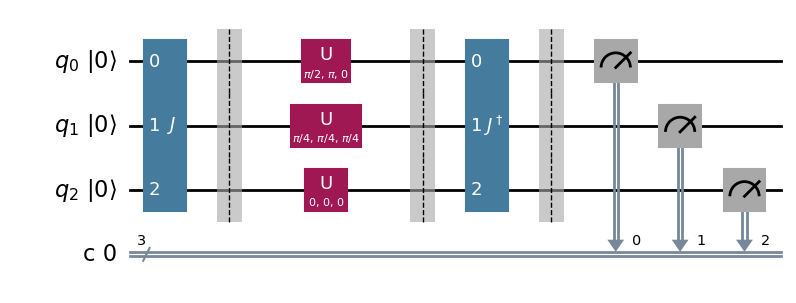

In [14]:
qc = QuantumCircuit(3, 3)

J = np.identity(8)

qc.unitary(J, qubits = [0,1,2], label = "$J$")

qc.barrier()

qc.u(np.pi/2, np.pi, 0, 0)
qc.u(np.pi/4, np.pi/4, np.pi/4, 1)
qc.u(0, 0, 0, 2)

qc.barrier()

qc.unitary(J, qubits = [0,1,2], label = "$J^\dagger$")

qc.barrier()

qc.measure([0,1,2],[0,1,2])


gate_colours = {
    "displaycolor": {
        "$J^\dagger$": ("#457b9d", "#FFFFFF"),
        "$J$": ("#457b9d", "#FFFFFF"),
    }
}
qc.draw(output='mpl', style=gate_colours, initial_state=True)

Redes.

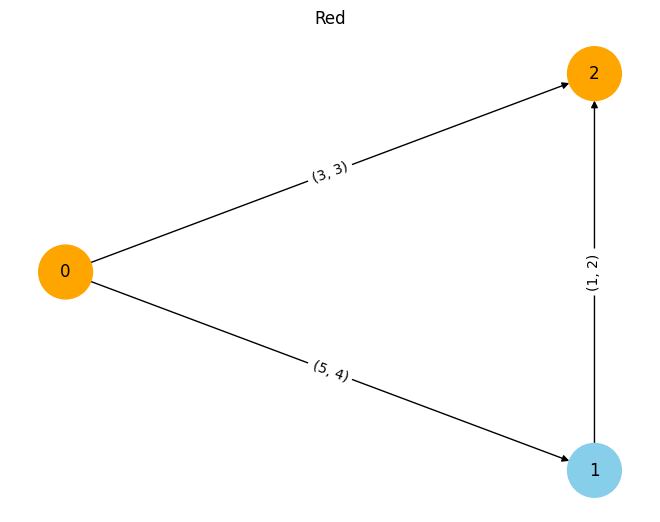

In [15]:
networkGenerator = NetworkGenerator()
drawer = NetworkDrawer()

N = networkGenerator.generate_random(3)
drawer.draw(N, "latency")
N.reset_flow()

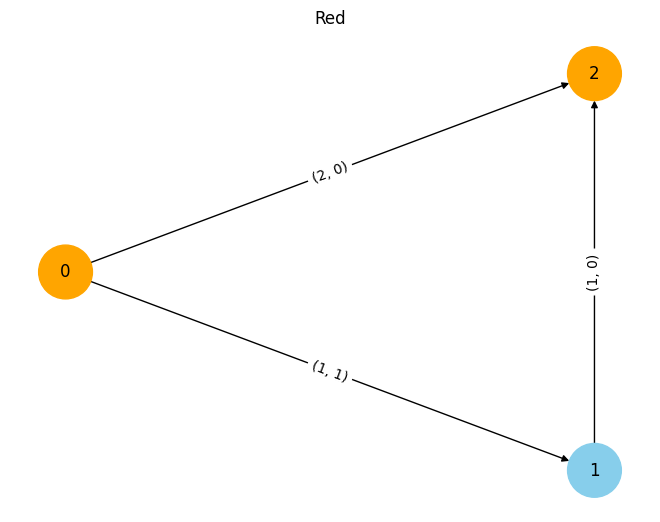

In [16]:
N = networkGenerator.generate_based_on_definition(3,[(0, 1, {"latency": (1,1)}),(0, 2, {"latency": (2,0)}),(1, 2, {"latency": (1,0)})])
drawer.draw(N, "latency")

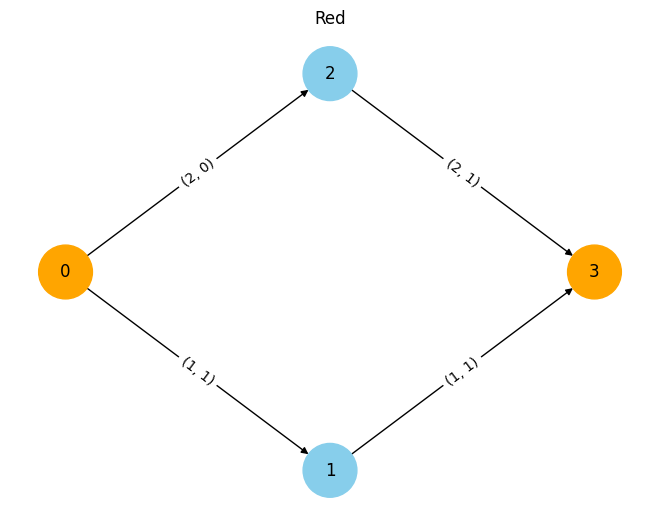

In [17]:
N = networkGenerator.generate_based_on_definition(4,[(0, 1, {"latency": (1,1)}),
                                                     (1, 3, {"latency": (1,1)}),
                                                     (0, 2, {"latency": (2,0)}),
                                                     (2, 3, {"latency": (2,1)})
                                                    ])
drawer.draw(N, "latency")

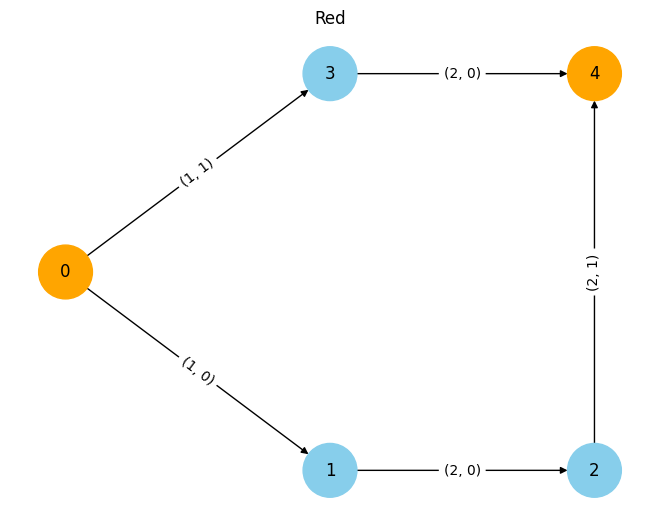

In [18]:
N = networkGenerator.generate_based_on_definition(5,[(0, 1, {"latency": (1,0)}),
                                                     (1, 2, {"latency": (2,0)}),
                                                     (2, 4, {"latency": (2,1)}),
                                                     (0, 3, {"latency": (1,1)}),
                                                     (3, 4, {"latency": (2,0)}),
                                                    ])
drawer.draw(N, "latency")

Circuito de entrelazamiento.

(<Figure size 2000x500 with 1 Axes>, <Axes: >)


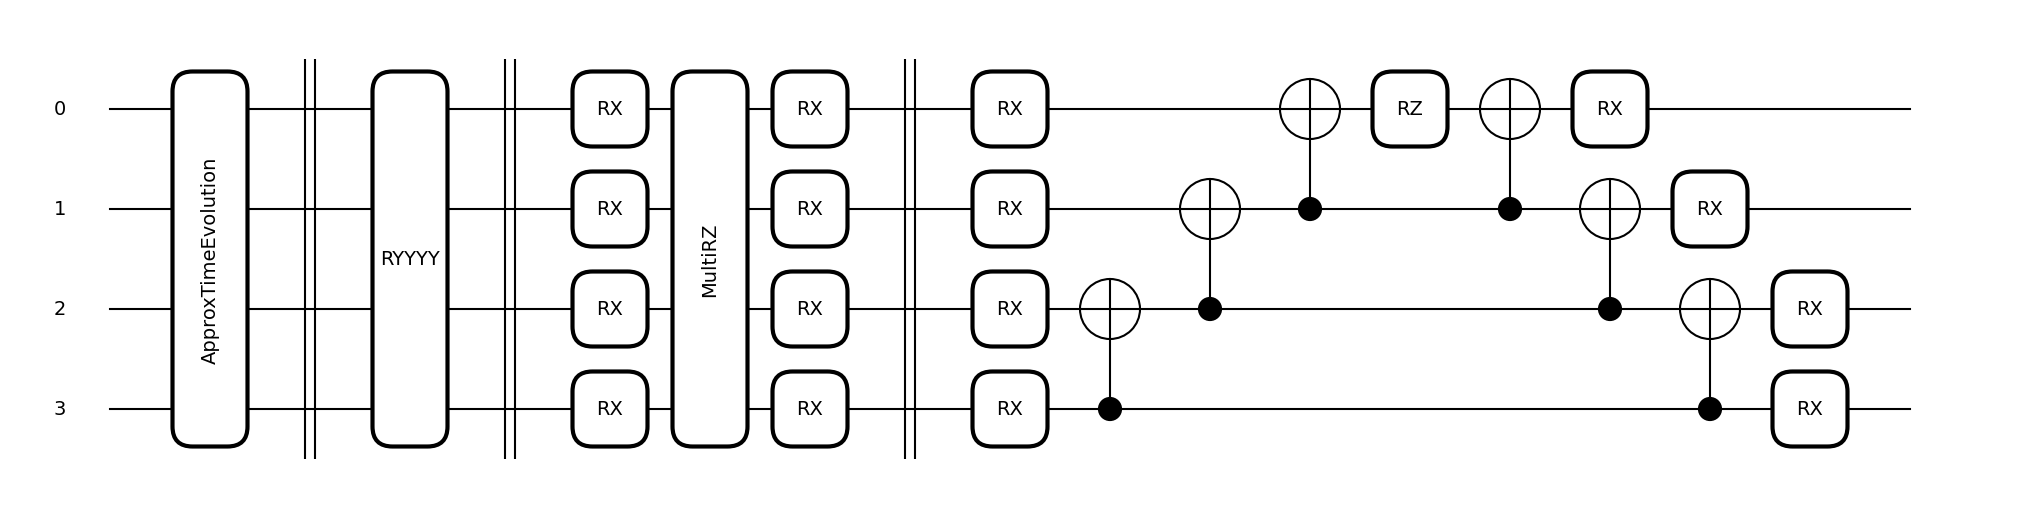

In [19]:
n = 4
dev = qml.device("default.qubit", wires=n)

@qml.qnode(dev)
def circuit(gamma):
    op = qml.PauliY(0)
    for i in range(1,n):
        op @= qml.PauliY(i)
    H = qml.Hamiltonian([1/2], [op])
    op1 = qml.ApproxTimeEvolution(H, time=gamma, n=1)
    qml.Barrier()
    op2 = op1.decomposition()
    qml.Barrier()
    op3 = op2[0].decomposition()
    qml.Barrier()
    for op4 in op3:
        if op4.name == "MultiRZ":
            op4.decomposition()
        else:
            qml.apply(op4)

print(qml.draw_mpl(circuit)(np.pi/4))